# Summary

This notebook proposes several naive baselines for recommendations.

In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import numpy as np
import utils
from collections import Counter
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
rating, user_column_index, item_column_index = utils.get_movielens_data()

(100000, 4)
(1682, 24)
(943, 5)


In [3]:
rating["rating"] = rating["rating"]/5
# rating["rating"] =  MinMaxScaler().fit_transform(rating[["rating"]].values).reshape(-1)

In [4]:
n_users = rating["userid"].max() + 1
n_items = rating["itemid"].max() + 1
print(n_users, n_items)
train_df, test_df = utils.movielens_train_test_split(rating)
train_df.shape, test_df.shape

train_df, val_df = utils.movielens_train_test_split(train_df)
train_df.shape, val_df.shape

944 1683


((98105, 49), (943, 49))

<AxesSubplot:>

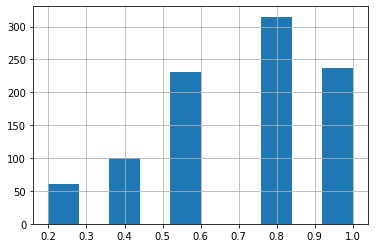

In [5]:
test_df["rating"].hist()

# Predict the train average of all users

In [6]:
print(np.mean(np.abs(test_df["rating"].values - test_df["rating"].mean())))
print(np.mean(np.abs(test_df["rating"].values - train_df["rating"].mean())))

0.19339420117424932
0.19594300758655422


# Predict the train mode of all users

In [7]:
print(np.mean(np.abs(test_df["rating"].values - train_df["rating"].mode()[0])))
print(np.mean(np.abs(test_df["rating"].values - test_df["rating"].mode()[0])))

0.17985153764581127
0.17985153764581127


# For each user predict its average

In [8]:
pred  = train_df.groupby("userid")[["rating"]].mean().reset_index()
res = pd.merge(test_df[['userid', 'itemid', 'rating']], pred, on = ['userid'], how = "left")
print("MAE for mean", mean_absolute_error(res["rating_x"].values, res["rating_y"].values))

MAE for mean 0.17189974911612543


# For each user predict its mode

In [9]:
pred  = train_df.groupby("userid")[["rating"]].agg(
    lambda x:x.value_counts().index[0]).reset_index()

res = pd.merge(test_df[['userid', 'itemid', 'rating']], pred, on = ['userid'], how = "left")
print("MAE for mode", mean_absolute_error(res["rating_x"].values, res["rating_y"].values))

MAE for mode 0.17454931071049842
